In [75]:
!pip install rdkit-pypi
!pip install openpyxl
!pip install pubchempy

In [76]:
# Import all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
import pubchempy as pcp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [77]:
# reading the data into a pandas data frame
data = pd.read_csv('hydrocarbons.csv')
data

,Class of hydrocarbon,IUPAC name,Melting point,Boiling point,Density,Flash point,Autoignition temp,pubchem_id,smiles
0,Trimetylalkane,"2,2,4-Trimethylpentane",-107.0,99.0,0.69,NaN,396,10907,CC(C)CC(C)(C)C
1,Triaromatics,Phenanthrene,99.0,338.0,1.18,171,>450,995,C1=CC=C2C(=C1)C=CC3=CC=CC=C32
2,Triaromatics,Anthracene,216.0,341.0,1.2825,NaN,NaN,8418,C1=CC=C2C=C3C=CC=CC3=CC2=C1
3,Triaromatics,1-methylanthracene,86.0,342.0,1.04799,NaN,NaN,11884,CC1=CC=CC2=CC3=CC=CC=C3C=C12
4,Triaromatics,2-methylanthracene,209.0,340.0,1.8,NaN,NaN,11936,CC1=CC2=CC3=CC=CC=C3C=C2C=C1
...,...,...,...,...,...,...,...,...,...
189,1-alkene,1-hexadecene,4.0,285.0,0.781,NaN,NaN,12395,CCCCCCCCCCCCCCC=C
190,1-alkene,1-heptadecene,11.0,301.0,0.785,NaN,NaN,23217,CCCCCCCCCCCCCCCC=C
191,1-alkene,1-octadecene,18.0,316.0,0.789,NaN,NaN,8217,CCCCCCCCCCCCCCCCC=C
192,1-alkene,1-nonadecene,23.0,331.0,0.78925,NaN,NaN,29075,CCCCCCCCCCCCCCCCCC=C


In [78]:
# Define a function to extract molecular properties from a SMILES string
def get_properties(smiles):
  # Convert the SMILES string to an RDKit molecule object
  mol = Chem.MolFromSmiles(smiles)

  # If the molecule was successfully created, calculate properties
  if mol:
    # Calculate the atomic weight of the molecule
    atomic_weight = Descriptors.MolWt(mol)
    # Calculate the number of aromatic rings in the molecule
    aromatic_rings = Descriptors.NumAromaticRings(mol)
    # Return the calculated properties
    return atomic_weight, aromatic_rings
  else:
    return None, None

# Apply the function to the dataset
data[['AtomicWeight', 'AromaticRings']] = data['smiles'].apply(lambda x: pd.Series(get_properties(x)))

In [79]:
# Ensuring that the AtomicWeight and the AromaticRings columns were appended to the dataframe
data

,Class of hydrocarbon,IUPAC name,Melting point,Boiling point,Density,Flash point,Autoignition temp,pubchem_id,smiles,AtomicWeight,AromaticRings
0,Trimetylalkane,"2,2,4-Trimethylpentane",-107.0,99.0,0.69,NaN,396,10907,CC(C)CC(C)(C)C,114.232,0.0
1,Triaromatics,Phenanthrene,99.0,338.0,1.18,171,>450,995,C1=CC=C2C(=C1)C=CC3=CC=CC=C32,178.234,3.0
2,Triaromatics,Anthracene,216.0,341.0,1.2825,NaN,NaN,8418,C1=CC=C2C=C3C=CC=CC3=CC2=C1,178.234,3.0
3,Triaromatics,1-methylanthracene,86.0,342.0,1.04799,NaN,NaN,11884,CC1=CC=CC2=CC3=CC=CC=C3C=C12,192.261,3.0
4,Triaromatics,2-methylanthracene,209.0,340.0,1.8,NaN,NaN,11936,CC1=CC2=CC3=CC=CC=C3C=C2C=C1,192.261,3.0
...,...,...,...,...,...,...,...,...,...,...,...
189,1-alkene,1-hexadecene,4.0,285.0,0.781,NaN,NaN,12395,CCCCCCCCCCCCCCC=C,224.432,0.0
190,1-alkene,1-heptadecene,11.0,301.0,0.785,NaN,NaN,23217,CCCCCCCCCCCCCCCC=C,238.459,0.0
191,1-alkene,1-octadecene,18.0,316.0,0.789,NaN,NaN,8217,CCCCCCCCCCCCCCCCC=C,252.486,0.0
192,1-alkene,1-nonadecene,23.0,331.0,0.78925,NaN,NaN,29075,CCCCCCCCCCCCCCCCCC=C,266.513,0.0


In [80]:
# Fill missing values in the 'Melting point' and 'Boiling point' column with the column's mean value
data['Melting point'].fillna(data['Melting point'].mean(), inplace=True)
data['Boiling point'].fillna(data['Boiling point'].mean(), inplace=True)

In [81]:
# Select the independant variables for the model
X = data[['AtomicWeight', 'AromaticRings']]

# Select the target variable for predicting the melting point
y_melting = data['Melting point']
# Select the target variable for predicting the boiling point
y_boiling = data['Boiling point']

In [82]:
# Splitting the data for the regression model for boiling and melting point
X_train,X_test, y_melting_train,y_melting_test, y_boiling_train, y_boiling_test = train_test_split(X,y_melting,y_boiling, test_size=0.2, random_state=42)

In [83]:
# Initialize the RandomForestRegressor model
model_rf = RandomForestRegressor()

# Random Forest model for boiling point prediction
model_rf.fit(X_train, y_boiling_train)
y_boiling_pred_rf = model_rf.predict(X_test)

# Random Forest model for melting point prediction
model_rf.fit(X_train, y_melting_train)
y_melting_pred_rf = model_rf.predict(X_test)

In [84]:
# Predict and Evaluate
# Evaluate the Random Forest model
print("Random Forest Boiling Point Model - RMSE:", mean_squared_error(y_boiling_test, y_boiling_pred_rf, squared=False))
print("Random Forest Boiling Point Model - R²:", r2_score(y_boiling_test, y_boiling_pred_rf))
print('')
print("Random Forest Boiling Point Model - RMSE:", mean_squared_error(y_melting_test, y_melting_pred_rf, squared=False))
print("Random Forest Boiling Point Model - R²:", r2_score(y_melting_test, y_melting_pred_rf))

Random Forest Boiling Point Model - RMSE: 24.433732905674848
Random Forest Boiling Point Model - R²: 0.9631423930807889

Random Forest Boiling Point Model - RMSE: 43.691280898839494
Random Forest Boiling Point Model - R²: 0.6345898071390812


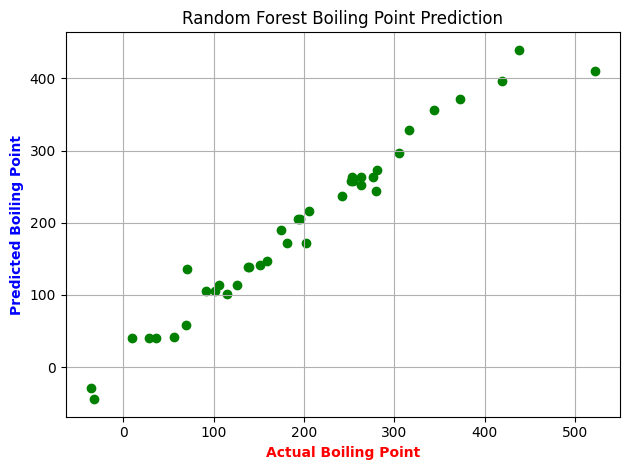

In [85]:
# Create a scatter plot of actual vs. predicted boiling points using the Random Forest model
plt.scatter(y_boiling_test, y_boiling_pred_rf, color='green')
plt.xlabel('Actual Boiling Point', color='red', fontweight='bold')
plt.ylabel('Predicted Boiling Point',c='blue', fontweight='bold')
plt.title('Random Forest Boiling Point Prediction')
plt.grid(True)
plt.tight_layout()
plt.show()

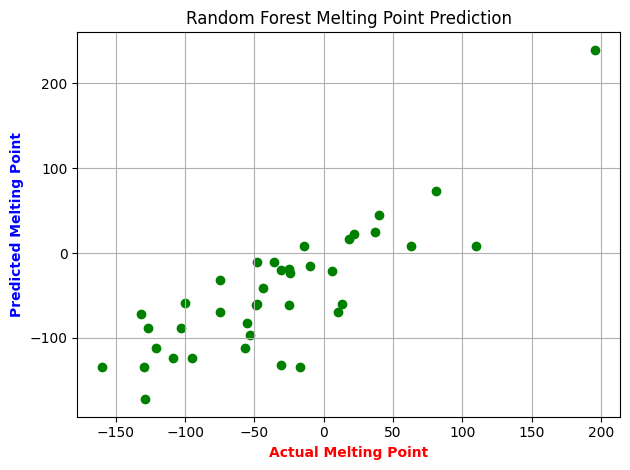

In [86]:
# Create a scatter plot of actual vs. predicted Melting points using the Random Forest model
plt.scatter(y_melting_test, y_melting_pred_rf, color='green')
plt.xlabel('Actual Melting Point', color='red', fontweight='bold')
plt.ylabel('Predicted Melting Point',c='blue', fontweight='bold')
plt.title('Random Forest Melting Point Prediction')
plt.grid(True)
plt.tight_layout()
plt.show()